In [1]:
#Required Libraries to be imported

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [2]:
df=pd.read_csv('NSE-TATAGLOBAL11.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [6]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

<AxesSubplot: >

<Figure size 2000x800 with 0 Axes>

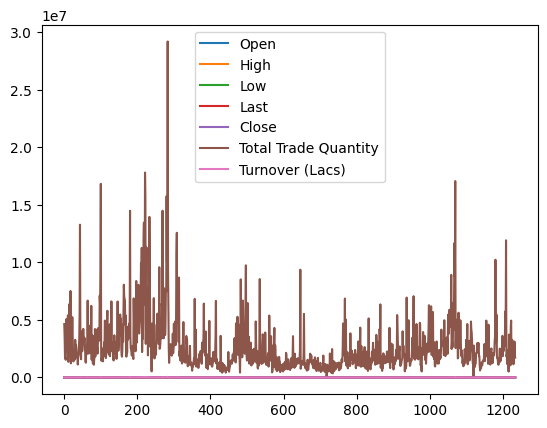

In [7]:
plt.figure(figsize=(20,8))
df.plot()

In [8]:
df['Date'].value_counts()


2018-10-08    1
2015-06-15    1
2015-06-04    1
2015-06-05    1
2015-06-08    1
             ..
2017-02-09    1
2017-02-10    1
2017-02-13    1
2017-02-14    1
2013-10-08    1
Name: Date, Length: 1235, dtype: int64

In [9]:
df['Date']=pd.to_datetime(df['Date'])


In [10]:
df['Date']


0      2018-10-08
1      2018-10-05
2      2018-10-04
3      2018-10-03
4      2018-10-01
          ...    
1230   2013-10-14
1231   2013-10-11
1232   2013-10-10
1233   2013-10-09
1234   2013-10-08
Name: Date, Length: 1235, dtype: datetime64[ns]

In [11]:
df=df.sort_values(by="Date")


In [12]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06


In [13]:
df.reset_index(inplace=True)


In [14]:
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1234,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
1,1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2,1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
3,1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
4,1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...,...
1230,4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
1231,3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
1232,2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1233,1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06


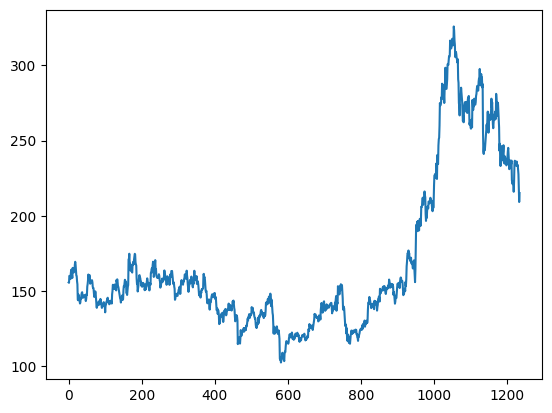

In [15]:
plt.plot(df['Close'])


<AxesSubplot: >

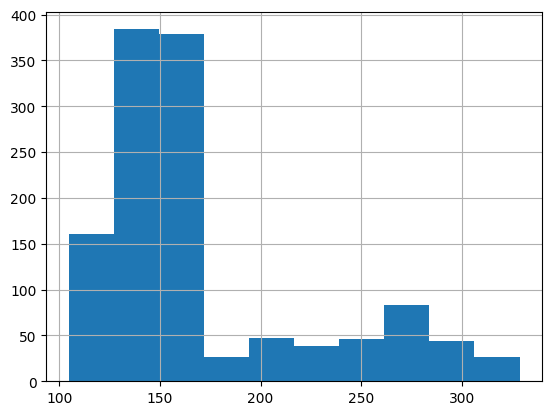

In [16]:
df['High'].hist()


In [17]:
d1=df['Close']


In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
d1=scaler.fit_transform(np.array(d1).reshape(-1,1))


In [19]:
d1

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [20]:
training_size=int(len(d1)*0.70)
test_size=len(d1)-training_size

In [21]:
train_data=d1[0:training_size,:]


In [22]:
test_data=d1[training_size:len(d1),:1]


In [23]:
train_data

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       [0.25728373],
       [0.25459435],
       [0.24831914],
       [0.2660242 ],
       [0.27588525],
       [0.2552667 ],
       [0.26535186],
       [0.25145675],
       [0.28148812],
       [0.27431645],
       [0.27162707],
       [0.26781712],
       [0.27947109],
       [0.27498879],
       [0.29157329],
       [0.29964142],
       [0.29112506],
       [0.27297176],
       [0.25862842],
       [0.25750784],
       [0.2415957 ],
       [0.23263111],
       [0.18668758],
       [0.18511878],
       [0.20192739],
       [0.18780816],
       [0.19139399],
       [0.18377409],
       [0.17548185],
       [0.17817122],
       [0.19206634],
       [0.19004931],
       [0.20170327],
       [0.20730614],
       [0.20909906],
       [0.19789332],
       [0.19229045],
       [0.19722098],
       [0.19520394],
       [0.19744509],
       [0.20080681],
       [0.19878978],
       [0.19766921],
       [0.19049753],
       [0.182

In [24]:
def datasetcrtd(dataset,time_step):
  datax,datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)


In [28]:
time_step=100
x_train,y_train=datasetcrtd(train_data,time_step)
x_test,y_test=datasetcrtd(test_data,time_step)


In [29]:
x_train.shape


(763, 100)

In [30]:
y_train.shape


(763,)

In [31]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
ytest=x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [32]:
model=Sequential()


In [33]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)


Epoch 1/60
11/11 [==============================] - 20s 559ms/step - loss: 0.0129 - val_loss: 0.0011
Epoch 2/60
11/11 [==============================] - 4s 349ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 3/60
11/11 [==============================] - 3s 292ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 4/60
11/11 [==============================] - 3s 272ms/step - loss: 0.0016 - val_loss: 5.8275e-04
Epoch 5/60
11/11 [==============================] - 3s 281ms/step - loss: 0.0012 - val_loss: 5.1786e-04
Epoch 6/60
11/11 [==============================] - 3s 277ms/step - loss: 0.0011 - val_loss: 5.5422e-04
Epoch 7/60
11/11 [==============================] - 3s 275ms/step - loss: 0.0011 - val_loss: 5.9161e-04
Epoch 8/60
11/11 [==============================] - 3s 294ms/step - loss: 9.7547e-04 - val_loss: 5.4377e-04
Epoch 9/60
11/11 [==============================] - 3s 310ms/step - loss: 9.5596e-04 - val_loss: 5.1479e-04
Epoch 10/60
11/11 [==============================] - 3s 281ms/step 

In [35]:
test_predict=model.predict(x_test)
test_predict1=scaler.inverse_transform(test_predict)

9/9 [==============================] - 2s 66ms/step


In [36]:
math.sqrt(mean_squared_error(y_test,test_predict))


0.058380883257875764

In [37]:
df_testing_complete=pd.read_csv('NSE-TATAGLOBAL11.csv')


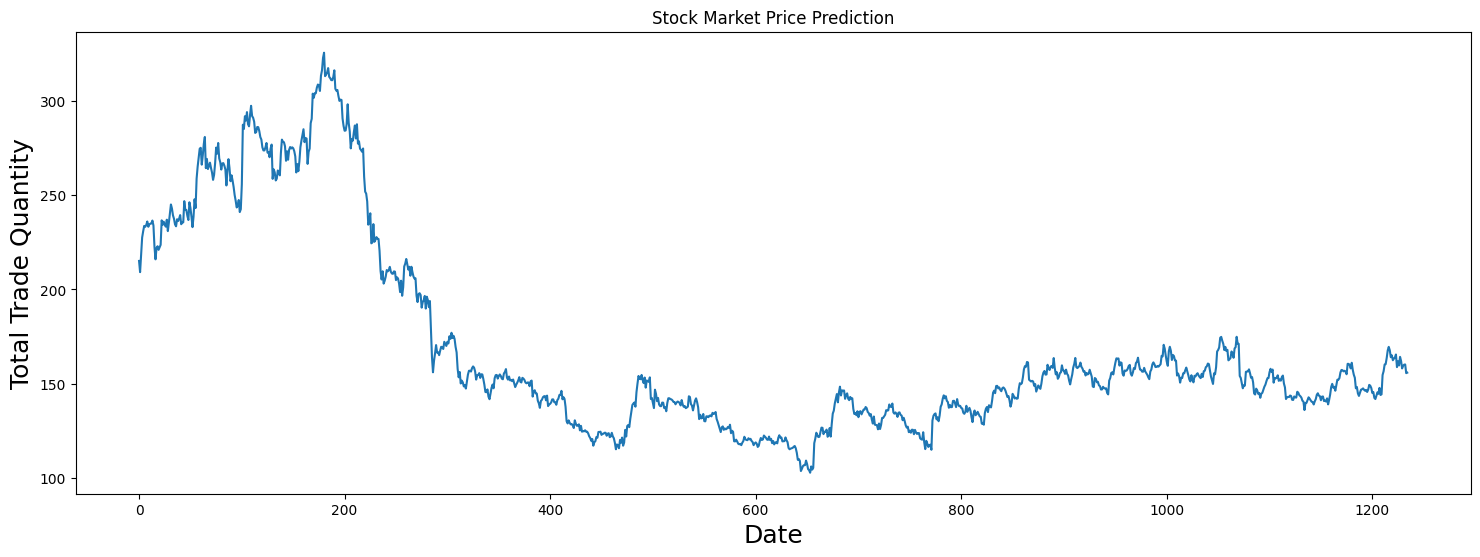

In [38]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(df_testing_complete['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()


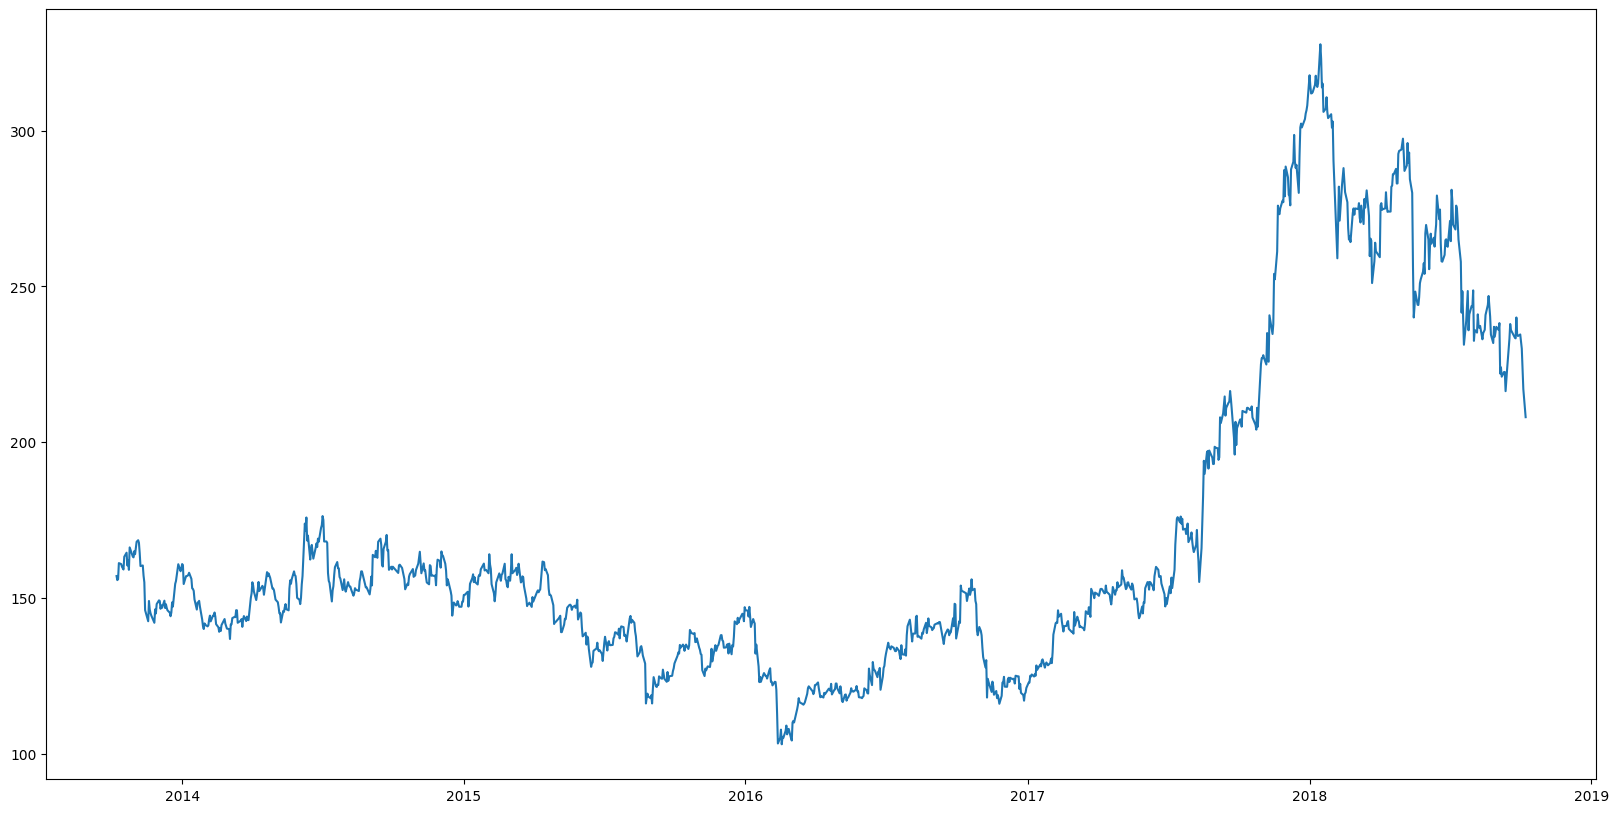

In [39]:
df.index = df['Date']
plt.figure(figsize=(20, 10))
plt.plot(df["Open"], label='ClosePriceHist')


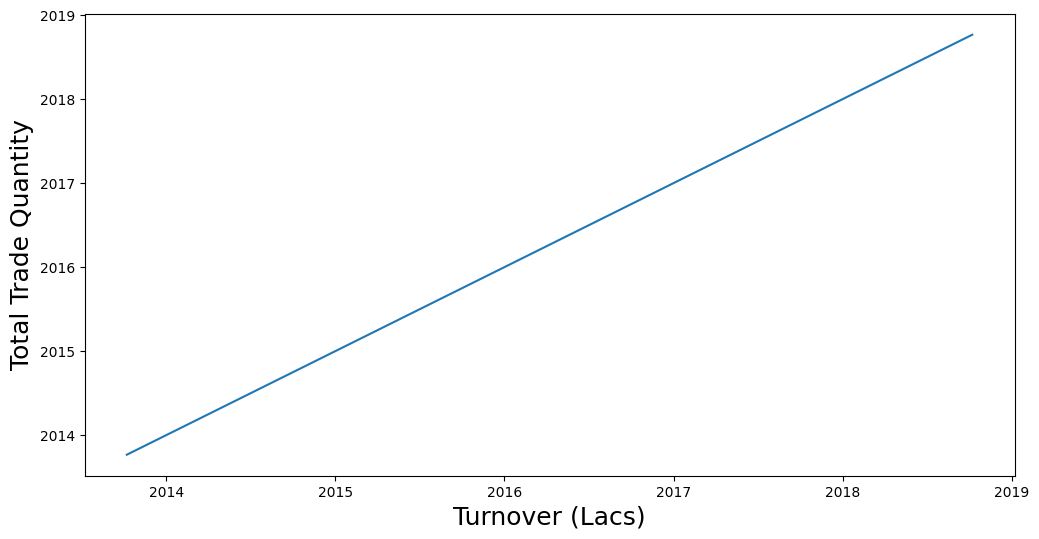

In [40]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()


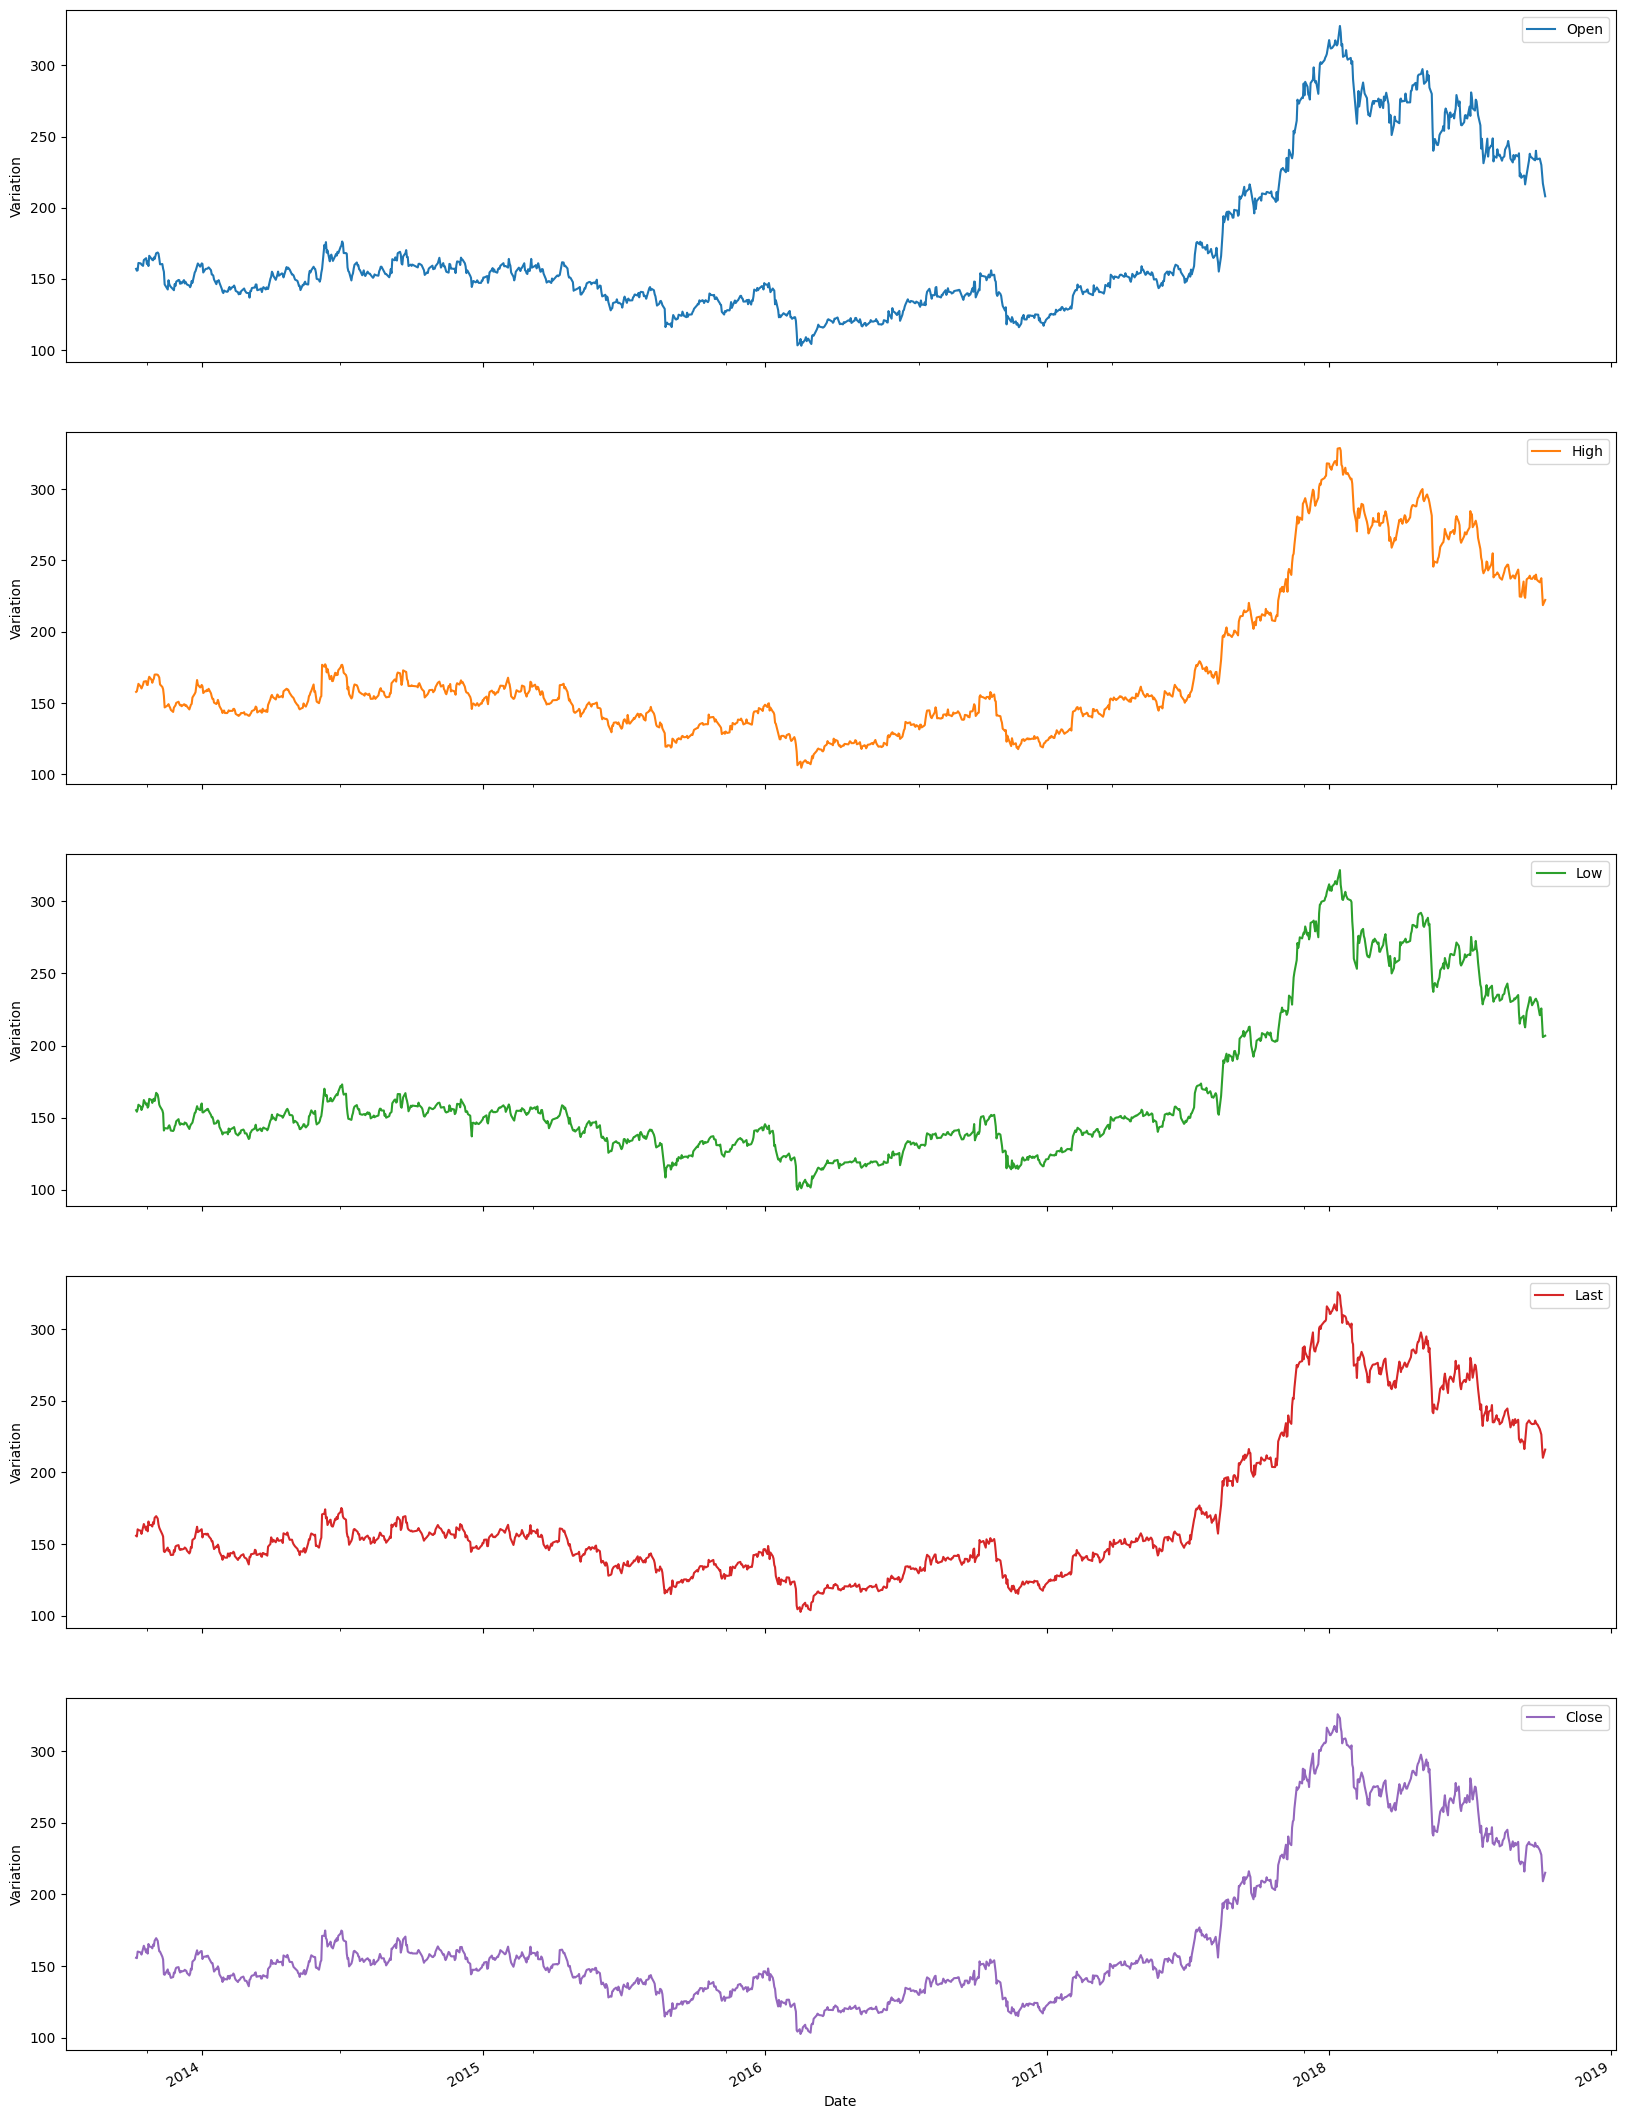

In [45]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)
for i in axes:
    i.set_ylabel('Variation')